<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> Low level implementation of a solution by gradient descent. Basic and stochastic approach.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import and init


In [1]:
import numpy as np
import sys

sys.path.append('..')
import fidle.pwk as pwk

from modules.RegressionCooker import RegressionCooker 

# ---- Init Fidle stuffs
#
datasets_dir = pwk.init('GRAD1')

# ---- Instanciate a Regression Cooker
#
cooker = RegressionCooker(pwk)

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.6
Notebook id          : GRAD1
Run time             : Tuesday 26 January 2021, 16:10:44
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/tmp/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


<br>**FIDLE 2020 - Regression Cooker**

Version      : 0.1
Run time     : Tuesday 26 January 2021, 16:10:44


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


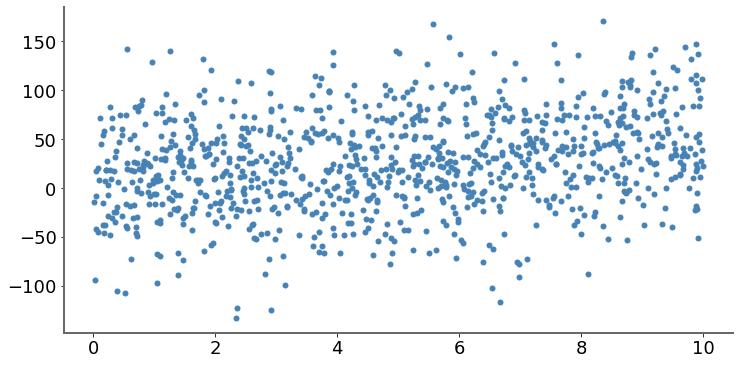

X                :      mean=   5.002  std=   2.885    min=   0.000    max=  10.000
Y                :      mean=  25.051  std=  48.430    min=-213.875    max= 264.306


In [2]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [3]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   5.002  std=   2.885    min=   0.000    max=  10.000
X normalized     :      mean=  -0.000  std=   1.000    min=  -1.734    max=   1.732


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta


    0  +25.338   -9.867  -0.476   -4.835  +0.005


   20  +11.816   -6.587  -0.318   -3.228  +0.082


   40   +5.789   -4.398  -0.212   -2.155  +0.134


   60   +3.103   -2.936  -0.142   -1.439  +0.169


   80   +1.906   -1.960  -0.095   -0.960  +0.192


  100   +1.372   -1.309  -0.063   -0.641  +0.207


  120   +1.135   -0.874  -0.042   -0.428  +0.217


  140   +1.029   -0.583  -0.028   -0.286  +0.224


  160   +0.981   -0.389  -0.019   -0.191  +0.229


  180   +0.960   -0.260  -0.013   -0.127  +0.232


  200   +0.951   -0.174  -0.008   -0.085  +0.234


<br>**Visualization :**

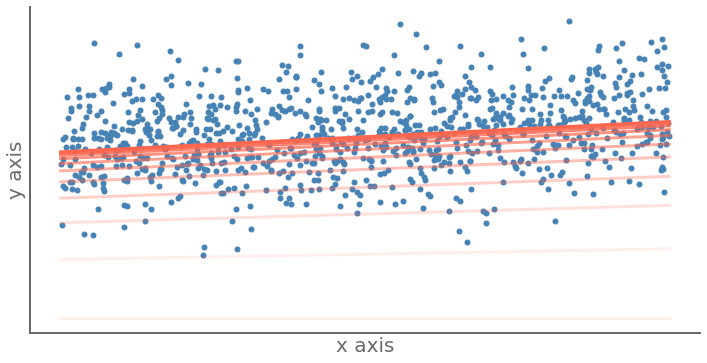

<br>**Loss :**

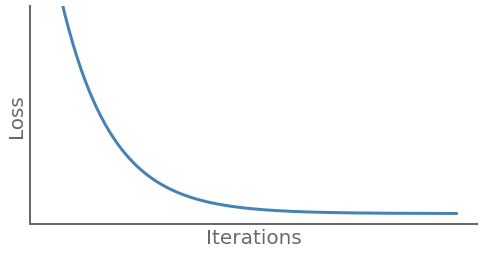

In [4]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.963   -3.763  -3.672   -0.142  +0.232
    1   +0.907   -1.335  +0.650   -0.178  +0.214
    2   +0.543   +4.082  +4.344   +0.019  +0.207
    3   +0.198   -0.619  -2.890   -0.007  +0.238
    4   +0.802   +7.457  -0.753   +0.017  +0.232
    5   +0.771   +4.983  -1.264   -0.007  +0.223
    6   +1.051   -8.997  +1.937   -0.004  +0.204
    7   +1.082   -5.391  -8.007   +0.027  +0.235
    8   +1.122  -15.862  +2.374   +0.008  +0.214
    9   +1.652   +4.500 -11.075   -0.009  +0.207


<br>**Visualization :**

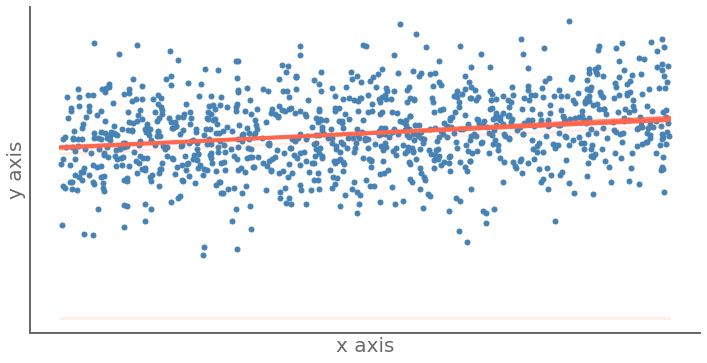

<br>**Loss :**

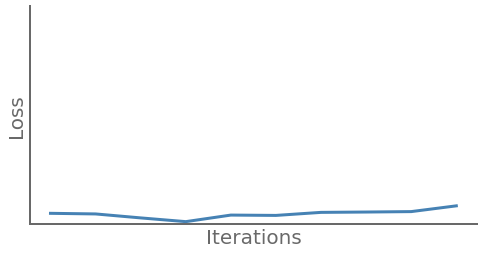

In [5]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [6]:
pwk.end()

End time is : Tuesday 26 January 2021, 16:10:49
Duration is : 00:00:05 859ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>